In [1]:
# Data
import numpy as np
import pandas as pd

# Plotting
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 
%config InlineBackend.figure_formats = ['retina']
sns.set_style("white")

In [2]:
# Read in clean USAID data pickle
usaid = pd.read_pickle('./clean_usaid.pkl')

In [3]:
usaid.head()

,country_name,region_name,income_group_name,implementing_agency_name,dac_category_name,dac_sector_name,assistance_category_name,fiscal_year,constant_amount
0,Afghanistan,South and Central Asia,Low Income Country,Department of Defense,Governance,"Conflict, Peace, and Security",Military,2011,10914528417
1,Afghanistan,South and Central Asia,Low Income Country,Department of Defense,Governance,"Conflict, Peace, and Security",Military,2012,9966142830
4,Afghanistan,South and Central Asia,Low Income Country,Department of Defense,Governance,"Conflict, Peace, and Security",Military,2013,7345968099
7,Afghanistan,South and Central Asia,Low Income Country,Department of Defense,Governance,"Conflict, Peace, and Security",Military,2010,7245724425
9,Afghanistan,South and Central Asia,Low Income Country,Department of Defense,Governance,"Conflict, Peace, and Security",Military,2015,6207678503


In [4]:
usaid.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 359342 entries, 0 to 986232
Data columns (total 9 columns):
country_name                359342 non-null object
region_name                 359342 non-null object
income_group_name           359342 non-null object
implementing_agency_name    359342 non-null object
dac_category_name           359342 non-null object
dac_sector_name             359342 non-null object
assistance_category_name    359342 non-null object
fiscal_year                 359342 non-null int64
constant_amount             359342 non-null int64
dtypes: int64(2), object(7)
memory usage: 27.4+ MB


In [5]:
# Read in HDI data pickle
hdi = pd.read_pickle('./hdi_data.pkl')

In [6]:
hdi.head()

,Country,Year,HDI_Change
0,Afghanistan,1990,NaN
1,Albania,1990,-0.019
2,Algeria,1990,0.004
3,Andorra,1990,NaN
4,Angola,1990,NaN


In [7]:
hdi.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5292 entries, 0 to 5318
Data columns (total 3 columns):
Country       5292 non-null object
Year          5292 non-null int64
HDI_Change    4565 non-null float64
dtypes: float64(1), int64(1), object(1)
memory usage: 165.4+ KB


In [8]:
# Merge dataframes
df = pd.merge(usaid, hdi,  
              how='left', 
              left_on=['country_name','fiscal_year'], 
              right_on = ['Country','Year'])

In [9]:
df.head()

,country_name,region_name,income_group_name,implementing_agency_name,dac_category_name,dac_sector_name,assistance_category_name,fiscal_year,constant_amount,Country,Year,HDI_Change
0,Afghanistan,South and Central Asia,Low Income Country,Department of Defense,Governance,"Conflict, Peace, and Security",Military,2011,10914528417,Afghanistan,2011.0,0.011
1,Afghanistan,South and Central Asia,Low Income Country,Department of Defense,Governance,"Conflict, Peace, and Security",Military,2012,9966142830,Afghanistan,2012.0,0.005
2,Afghanistan,South and Central Asia,Low Income Country,Department of Defense,Governance,"Conflict, Peace, and Security",Military,2013,7345968099,Afghanistan,2013.0,0.004
3,Afghanistan,South and Central Asia,Low Income Country,Department of Defense,Governance,"Conflict, Peace, and Security",Military,2010,7245724425,Afghanistan,2010.0,0.008
4,Afghanistan,South and Central Asia,Low Income Country,Department of Defense,Governance,"Conflict, Peace, and Security",Military,2015,6207678503,Afghanistan,2015.0,0.001


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 359342 entries, 0 to 359341
Data columns (total 12 columns):
country_name                359342 non-null object
region_name                 359342 non-null object
income_group_name           359342 non-null object
implementing_agency_name    359342 non-null object
dac_category_name           359342 non-null object
dac_sector_name             359342 non-null object
assistance_category_name    359342 non-null object
fiscal_year                 359342 non-null int64
constant_amount             359342 non-null int64
Country                     355238 non-null object
Year                        355238 non-null float64
HDI_Change                  326397 non-null float64
dtypes: float64(2), int64(2), object(8)
memory usage: 35.6+ MB


In [11]:
# Drop redundant columns
df.drop(columns = {'Country', 'Year'}, inplace = True)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 359342 entries, 0 to 359341
Data columns (total 10 columns):
country_name                359342 non-null object
region_name                 359342 non-null object
income_group_name           359342 non-null object
implementing_agency_name    359342 non-null object
dac_category_name           359342 non-null object
dac_sector_name             359342 non-null object
assistance_category_name    359342 non-null object
fiscal_year                 359342 non-null int64
constant_amount             359342 non-null int64
HDI_Change                  326397 non-null float64
dtypes: float64(1), int64(2), object(7)
memory usage: 30.2+ MB


In [13]:
# Countries in the UN HDI dataset that the US has not given aid to
set(hdi.Country) - (set(usaid.country_name) & set(hdi.Country)) 

{'Andorra', 'Liechtenstein', 'United States'}

In [14]:
# Countries the US has given to that are not included in the UN HDI dataset
set(usaid.country_name) - (set(usaid.country_name) & set(hdi.Country))

{'Aruba',
 'Bermuda',
 'British Virgin Islands',
 'Cayman Islands',
 'China, Republic of (Taiwan)',
 'Curacao',
 'Korea, Democratic Republic',
 'Kosovo',
 'Macau',
 'Nauru',
 'New Caledonia',
 'Somalia',
 'Turks and Caicos Islands',
 'Tuvalu'}

In [15]:
# Drop Null Values for 'HDI_Change'
df = df[pd.notnull(df['HDI_Change'])]

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 326397 entries, 0 to 359341
Data columns (total 10 columns):
country_name                326397 non-null object
region_name                 326397 non-null object
income_group_name           326397 non-null object
implementing_agency_name    326397 non-null object
dac_category_name           326397 non-null object
dac_sector_name             326397 non-null object
assistance_category_name    326397 non-null object
fiscal_year                 326397 non-null int64
constant_amount             326397 non-null int64
HDI_Change                  326397 non-null float64
dtypes: float64(1), int64(2), object(7)
memory usage: 27.4+ MB


In [17]:
### Need to aggregate all individual expenses, sum total aid
### Break down by country/region/income/year/HDI(same for all 
### categories for country in given year), then break down by 
### Miltary/Economic aid, implementing agency, and Sector

df = df.groupby(['country_name', 
                 'region_name', 
                 'income_group_name', 
                 'fiscal_year', 
                 'HDI_Change',  
                 'assistance_category_name', 
                 'implementing_agency_name', 
                 'dac_category_name', 
                 'dac_sector_name']
               ).agg({'constant_amount': 'sum'})

df = df.reset_index()
df.head()

,country_name,region_name,income_group_name,fiscal_year,HDI_Change,assistance_category_name,implementing_agency_name,dac_category_name,dac_sector_name,constant_amount
0,Afghanistan,South and Central Asia,Low Income Country,2002,0.01,Economic,Department of Agriculture,Humanitarian,Emergency Response,2037638
1,Afghanistan,South and Central Asia,Low Income Country,2002,0.01,Economic,Department of Defense,Governance,"Conflict, Peace, and Security",3284849
2,Afghanistan,South and Central Asia,Low Income Country,2002,0.01,Economic,Department of Health and Human Services,Governance,"Conflict, Peace, and Security",799882
3,Afghanistan,South and Central Asia,Low Income Country,2002,0.01,Economic,Department of Health and Human Services,Health and Population,Basic Health,2743823
4,Afghanistan,South and Central Asia,Low Income Country,2002,0.01,Economic,Department of State,Governance,"Conflict, Peace, and Security",9331957


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51835 entries, 0 to 51834
Data columns (total 10 columns):
country_name                51835 non-null object
region_name                 51835 non-null object
income_group_name           51835 non-null object
fiscal_year                 51835 non-null int64
HDI_Change                  51835 non-null float64
assistance_category_name    51835 non-null object
implementing_agency_name    51835 non-null object
dac_category_name           51835 non-null object
dac_sector_name             51835 non-null object
constant_amount             51835 non-null int64
dtypes: float64(1), int64(2), object(7)
memory usage: 4.0+ MB


In [19]:
# Pickle combined df
df.to_pickle('./all_data.pkl')

In [20]:
# Write CSV of combined df
df.to_csv('./all_data.csv')

# Some initial EDA

In [21]:
# Which Programs have the most effect on increasing HDI?
df.groupby('dac_sector_name')['HDI_Change'].apply(lambda x: x.mean()).sort_values(ascending=False)

dac_sector_name
Action Relating To Debt                            0.011333
Construction                                       0.006882
Mineral Resources and Mining                       0.006496
HIV/AIDS                                           0.006365
Tourism                                            0.006262
Communications                                     0.006195
Developmental Food Aid/Food Security Assistance    0.006128
Basic Health                                       0.006110
Water Supply and Sanitation                        0.005970
Maternal and Child Health, Family Planning         0.005879
Emergency Response                                 0.005876
Industry                                           0.005863
Business and Other Services                        0.005783
Transport and Storage                              0.005776
Agriculture                                        0.005726
Operating Expenses                                 0.005706
Banking and Financial Se

In [22]:
# Debt relief provides the greatest average increase in HDI, BUT 
# it's a super small sample: 2 years in Pakistan, 1 in Kazakhstan
df.loc[df['dac_sector_name'] == 'Action Relating To Debt']

,country_name,region_name,income_group_name,fiscal_year,HDI_Change,assistance_category_name,implementing_agency_name,dac_category_name,dac_sector_name,constant_amount
24671,Kazakhstan,South and Central Asia,Upper Middle Income Country,2010,0.007,Economic,Department of Agriculture,Other,Action Relating To Debt,173505861
36219,Pakistan,South and Central Asia,Lower Middle Income Country,2003,0.014,Economic,Department of the Treasury,Other,Action Relating To Debt,245081311
36244,Pakistan,South and Central Asia,Lower Middle Income Country,2004,0.013,Economic,Department of the Treasury,Other,Action Relating To Debt,255303287


In [23]:
#df.loc[df['dac_sector_name'] == 'Construction']

In [24]:
# Which programs does the US spend the most money on?
df.groupby('dac_sector_name')['constant_amount'].apply(lambda x: x.sum()).sort_values(ascending=False)

dac_sector_name
Conflict, Peace, and Security                      287054675684
Other Multisector                                   90825862449
Government and Civil Society                        58525358653
Emergency Response                                  52163875892
HIV/AIDS                                            37012656227
Energy                                              27063286686
Other Social Infrastructure and Services            23383300551
Developmental Food Aid/Food Security Assistance     22439717487
Agriculture                                         13991722160
Transport and Storage                               13056270778
Basic Health                                        12687489725
Basic Education                                      9476065525
Operating Expenses                                   9455280688
Maternal and Child Health, Family Planning           9208344327
Water Supply and Sanitation                          7416349429
General Environmental Pr

In [74]:
# Which DAC Categories have the greatest impact?
category_avg_hdi = df.groupby(
    'dac_category_name')['HDI_Change'].apply(
    lambda x: x.mean()).sort_values(ascending=False).reset_index()
category_avg_hdi

,dac_category_name,HDI_Change
0,Commodity Assistance,0.006110
1,Health and Population,0.006080
2,Agriculture,0.005726
3,Economic Growth,0.005706
4,Humanitarian,0.005683
5,Infrastructure,0.005547
6,Education,0.005448
7,Governance,0.005408
8,Other,0.005350
9,Administrative Costs,0.005228


In [75]:
#df.groupby('implementing_agency_name')['HDI_Change'].apply(lambda x: x.mean()).sort_values(ascending=False)

In [76]:
# Which DAC Categories does the US spend the most money on?
category_sum_cost = df.groupby(
    'dac_category_name')['constant_amount'].apply(
    lambda x: x.sum()).sort_values(ascending=False).reset_index()
category_sum_cost

,dac_category_name,constant_amount
0,Governance,368963334888
1,Other,104552667941
2,Health and Population,68135832484
3,Humanitarian,55613548479
4,Infrastructure,40672528230
5,Commodity Assistance,23987137027
6,Economic Growth,20730655199
7,Agriculture,13991722160
8,Education,13207776026
9,Administrative Costs,12175597723


In [85]:
# Merge tables
merged = category_avg_hdi.merge(category_sum_cost, on='dac_category_name')

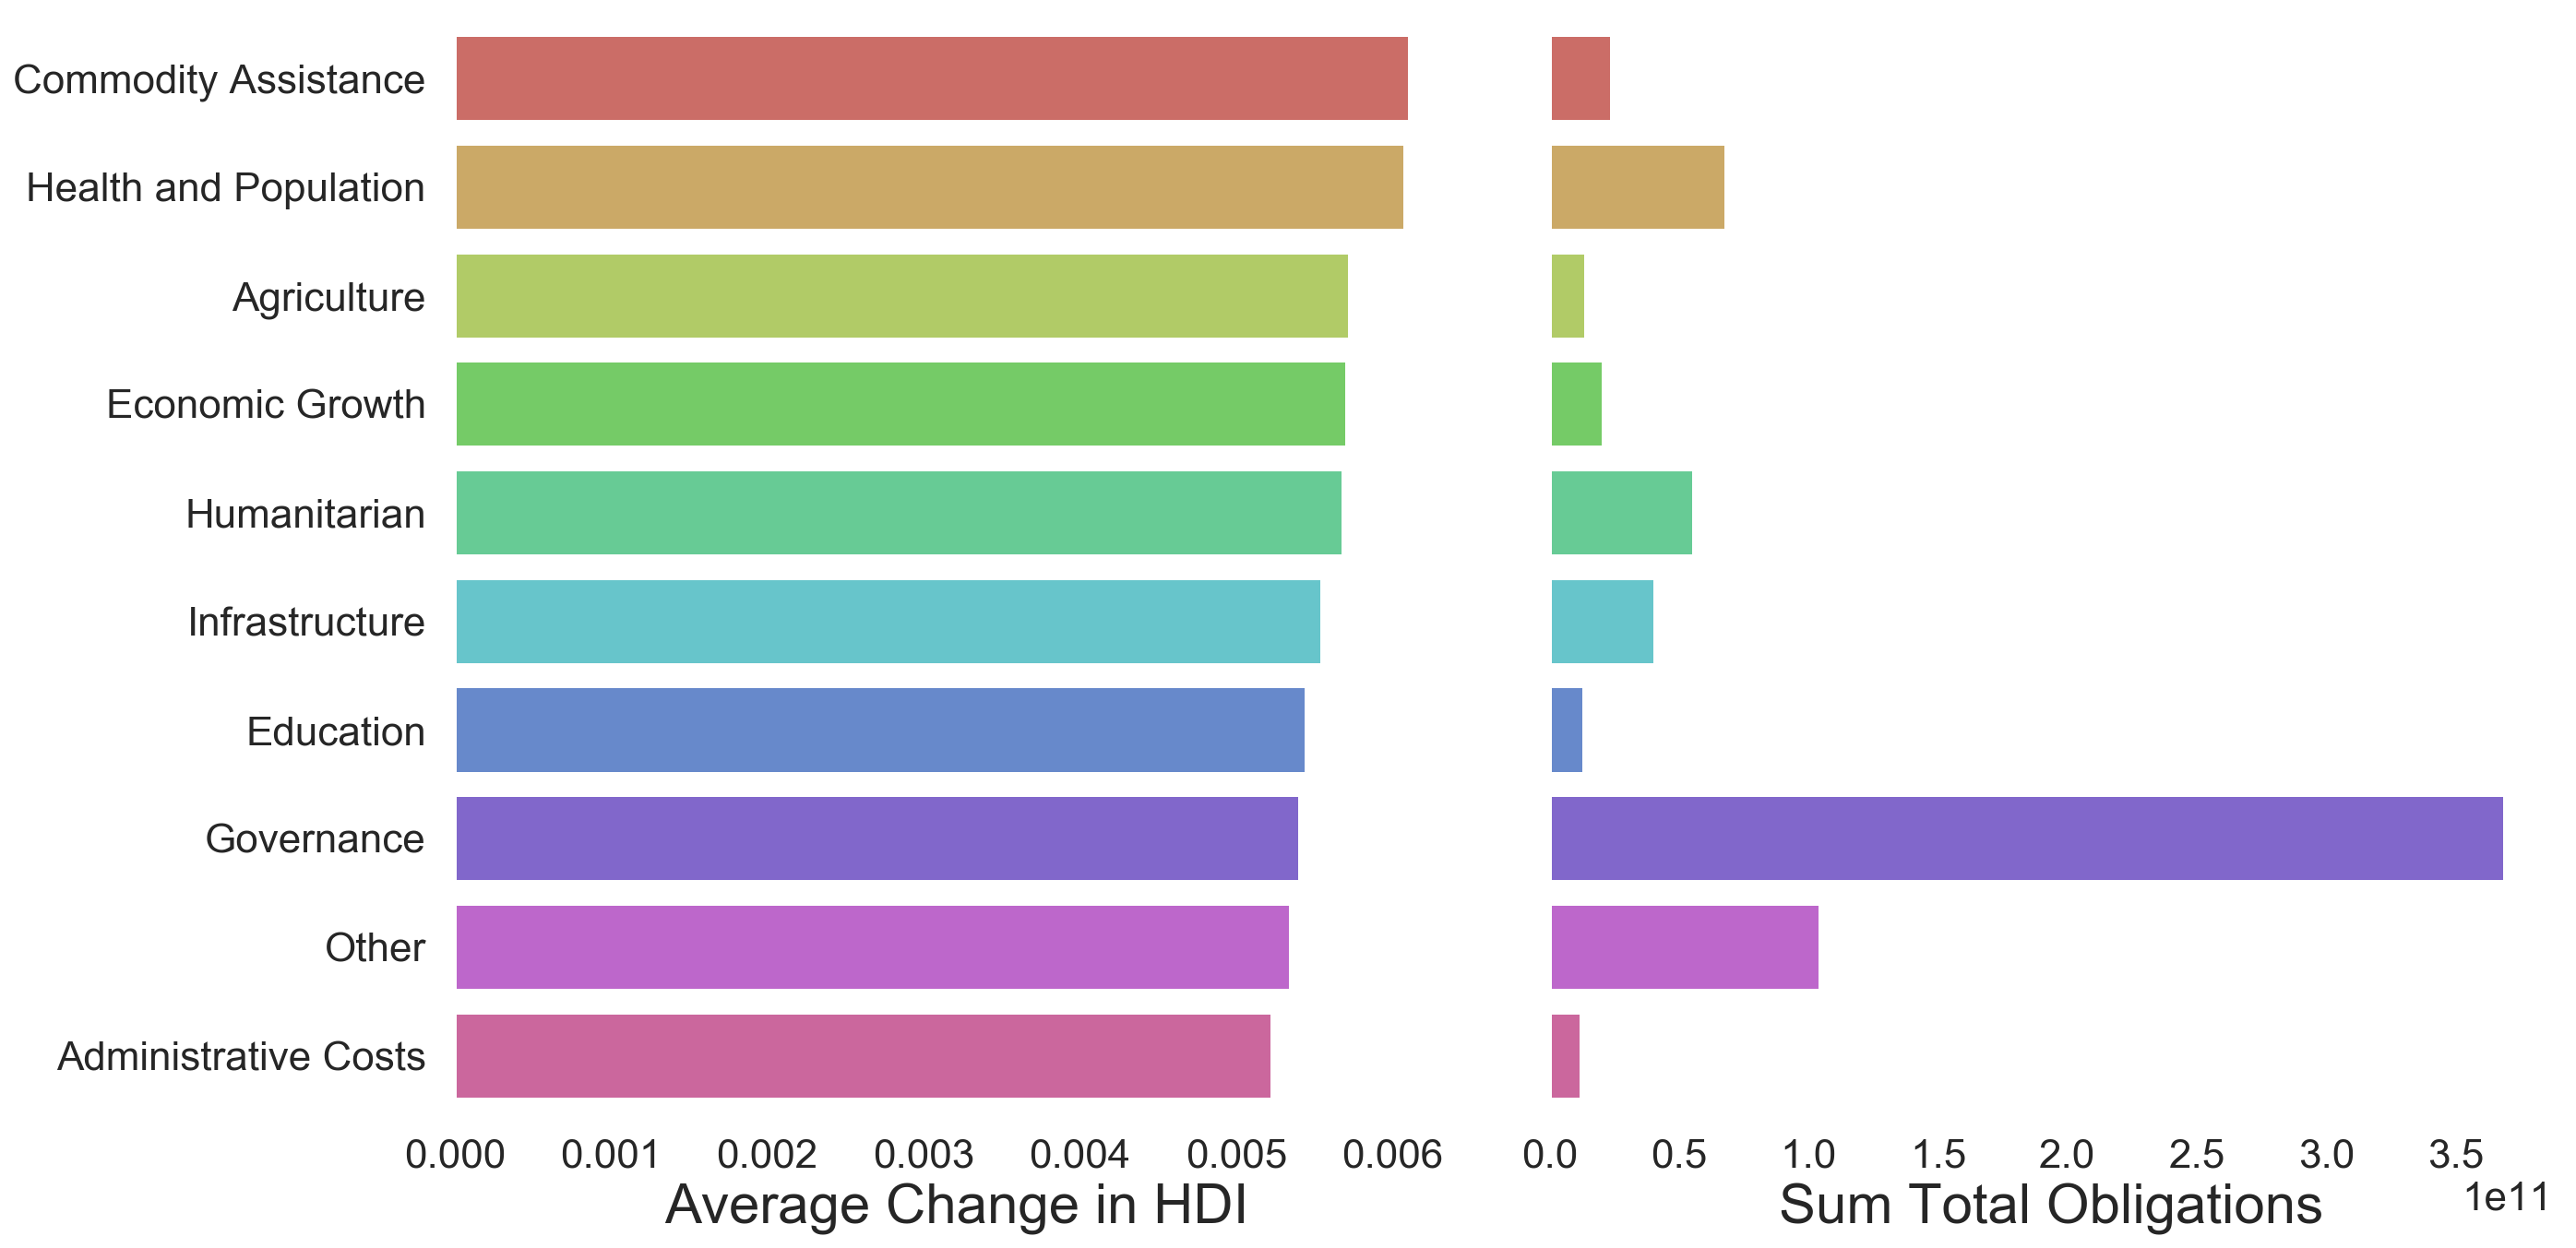

In [99]:
# GRAPH THESE!! 
# Set up the matplotlib figure
sns.set_context('poster')

f, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 10), sharex=False, sharey=True)
f.canvas.set_window_title('Program Categories')

sns.barplot(x='HDI_Change', y='dac_category_name', data=merged, palette="hls", ax=ax1)
ax1.set_xlabel('Average Change in HDI', fontsize=30)
ax1.set_ylabel(None)

sns.barplot(x='constant_amount', y='dac_category_name', data=merged, palette="hls", ax=ax2)
ax2.set_xlabel('Sum Total Obligations', fontsize=30)
ax2.set_ylabel(None)


plt.tight_layout(h_pad=2)
sns.despine(left=True, bottom=True)
#sns.set_context("poster")
#sns.barplot(x='HDI_Change', y='dac_category_name', data=category_avg_hdi, palette="hls")
#plt.savefig('top_20_countries.png', bbox_inches = 'tight');

In [27]:
# Take a look at which countries the US has given the most aid to from 1990-2017
# Dollar amounts are in 2016 USD
top_10 = df.groupby('country_name').sum().sort_values(
    'constant_amount', ascending = False)['constant_amount'].head(10)
top_10 = top_10.reset_index()
top_10

,country_name,constant_amount
0,Afghanistan,108661053672
1,Israel,107661487086
2,Iraq,77360732819
3,Egypt,67516411972
4,Russia,23946978382
5,Pakistan,19766495963
6,Jordan,18388737869
7,Colombia,15271134767
8,Ethiopia,11918207045
9,Kenya,10854815893


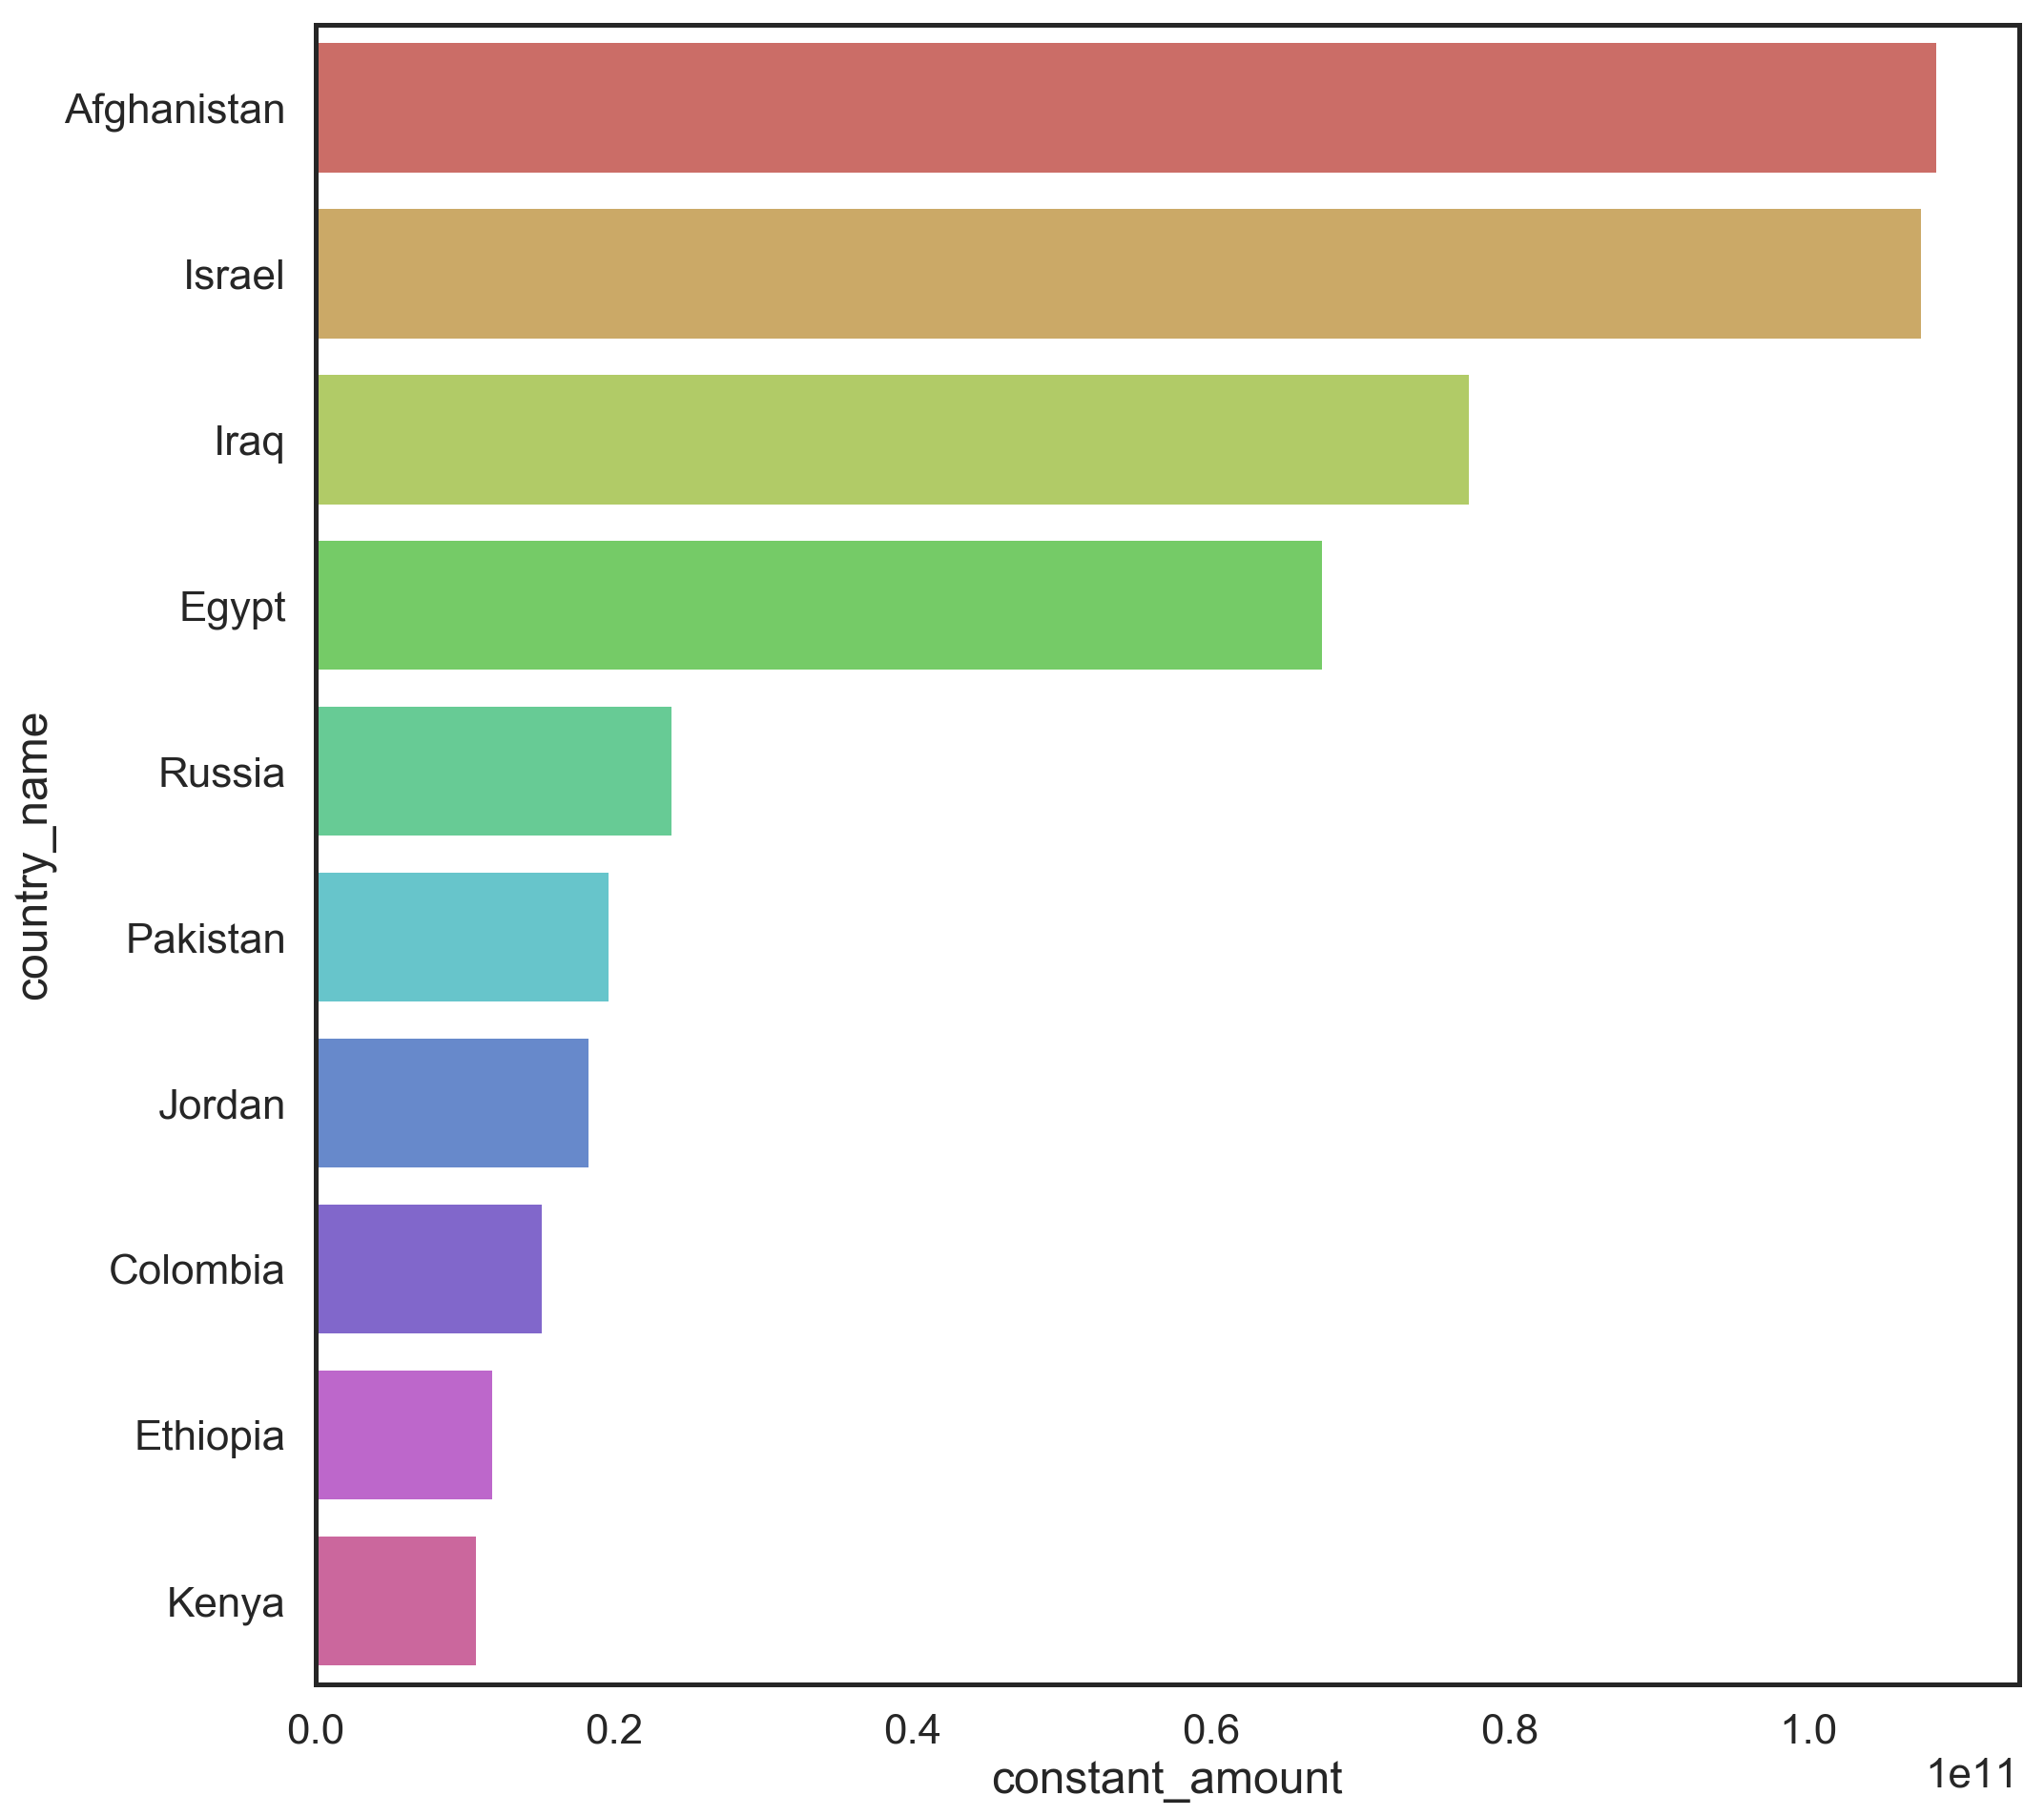

In [28]:
plt.figure(figsize=(16, 16))
sns.set_context("poster")
sns.barplot(x='constant_amount', y='country_name', data=top_10, palette="hls")
#plt.savefig('top_20_countries.png', bbox_inches = 'tight');

In [ ]:
# Top 10 for most change?

In [29]:
# Top 10 by year
# Merge dataframes
top_10_by_year = pd.merge(df, top_10, how='inner', on='country_name'
                         ).groupby(['country_name', 'fiscal_year']
                                  )['constant_amount_x'].sum().reset_index()
top_10_by_year.head()

,country_name,fiscal_year,constant_amount_x
0,Afghanistan,2002,677858114
1,Afghanistan,2003,1286968141
2,Afghanistan,2004,2476465248
3,Afghanistan,2005,2141045091
4,Afghanistan,2006,3600858850


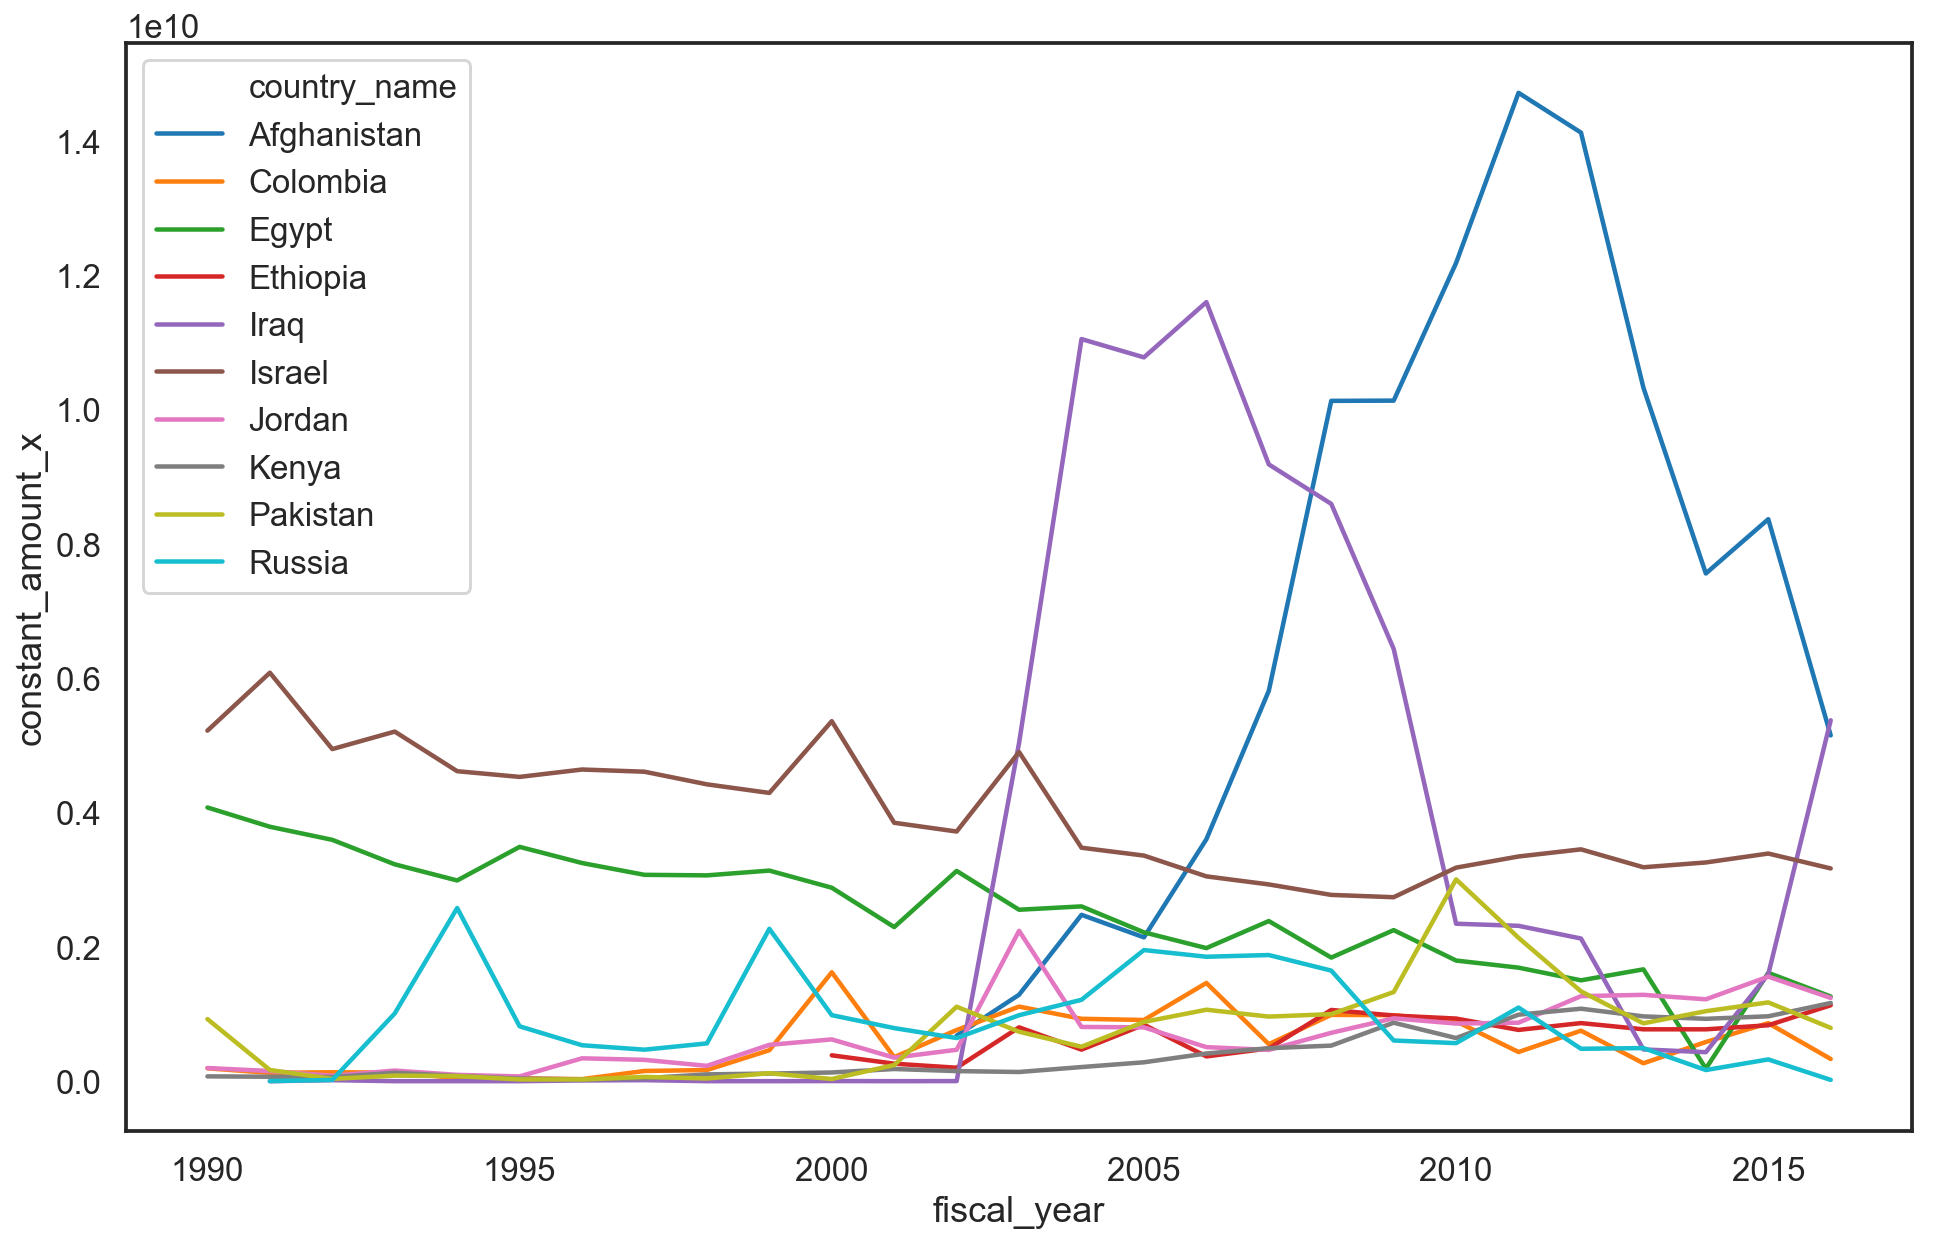

In [30]:
# Plot USAID spending for top 10 countries over time
sns.set_context("talk")
plt.figure(figsize=(16, 10))
sns.lineplot(x='fiscal_year', y='constant_amount_x', hue='country_name', data=top_10_by_year);

In [31]:
# Which income-level countries has the US given the most aid to?
df.groupby('income_group_name').sum().sort_values(
    'constant_amount', ascending = False)['constant_amount']

income_group_name
Lower Middle Income Country    204302032196
Upper Middle Income Country    199451410536
Low Income Country             192088180231
High Income Country            126189177194
Name: constant_amount, dtype: int64

In [32]:
# What type of aid has the US given to High Income Countries?
# df.loc[df.income_group_name == 'High Income Country']['USG_sector_name'].unique()

### Result: all kinds

In [33]:
# See how much money has been given to various sector programs/purposes
#df.groupby('USG_sector_name').sum().sort_values(
 #   'constant_amount', ascending = False)['constant_amount']

In [34]:
# Where assistance_category_name = 'Military', what are the kinds of programs?
df.loc[df['assistance_category_name'] == 'Military']['dac_sector_name'].unique()

array(['Conflict, Peace, and Security',
       'Other Social Infrastructure and Services', 'Other Multisector',
       'General Environmental Protection', 'Energy', 'Construction',
       'Trade Policy and Regulations', 'Government and Civil Society',
       'Health, General', 'Water Supply and Sanitation',
       'Transport and Storage'], dtype=object)

In [35]:
# What are the implementing agencies where assistance category = 'Military'?
df.loc[df['assistance_category_name'] == 'Military']['implementing_agency_name'].unique()

array(['Department of Defense', 'Department of the Army',
       'Department of State', 'Department of the Navy',
       'Department of the Air Force', 'Department of Homeland Security'],
      dtype=object)

In [36]:
# Where assistance_category_name = 'Economic', what are the kinds of programs?
df.loc[df['assistance_category_name'] == 'Economic']['dac_sector_name'].unique()
### Quite a bit of overlap (Economic assistance covers more issues)

array(['Emergency Response', 'Conflict, Peace, and Security',
       'Basic Health', 'Government and Civil Society',
       'General Environmental Protection',
       'Banking and Financial Services', 'Mineral Resources and Mining',
       'Tourism', 'Water Supply and Sanitation',
       'Reconstruction Relief and Rehabilitation', 'Communications',
       'Transport and Storage', 'Operating Expenses', 'Agriculture',
       'Developmental Food Aid/Food Security Assistance', 'Industry',
       'Maternal and Child Health, Family Planning', 'Basic Education',
       'Business and Other Services', 'Construction',
       'Post-Secondary Education', 'Energy', 'Other Multisector',
       'Health, General', 'Trade Policy and Regulations',
       'Other Social Infrastructure and Services',
       'Education, Level Unspecified', 'HIV/AIDS',
       'Program Design and Learning',
       'Disaster Prevention and Preparedness',
       'Administration and Oversight', 'Secondary Education',
       'Oth

In [37]:
# What are the implementing agencies where assistance category = 'Economic'?
df.loc[df['assistance_category_name'] == 'Economic']['implementing_agency_name'].unique()

array(['Department of Agriculture', 'Department of Defense',
       'Department of Health and Human Services', 'Department of State',
       'Department of the Treasury', 'Trade and Development Agency',
       'U.S. Agency for International Development', 'Department of Labor',
       'Department of the Army', 'Department of Transportation',
       'Department of Homeland Security', 'Department of Justice',
       'Department of Energy', 'Department of Commerce', 'Peace Corps',
       'Millennium Challenge Corporation', 'Department of the Interior',
       'African Development Foundation', 'Inter-American Foundation',
       'Environmental Protection Agency', 'National Science Foundation',
       'Open World Leadership Center', 'Federal Trade Commission',
       'United States Institute of Peace',
       'Overseas Private Investment Corporation'], dtype=object)

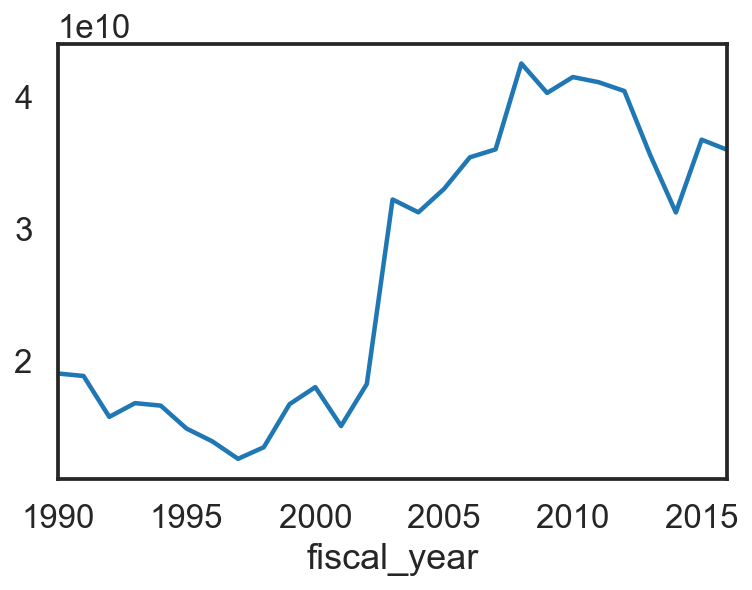

In [38]:
# How much has the goverment given to aid each year?
total_aid_by_year = df.groupby('fiscal_year').sum().sort_values('fiscal_year', ascending = False)['constant_amount']
total_aid_by_year.plot()

# Looks like aid increased significantly after 9/11 and the Iraq War

In [39]:
total_aid_by_year

fiscal_year
2016    35942127634
2015    36716358968
2014    31197433715
2013    35565150383
2012    40405147700
2011    41073345423
2010    41465339417
2009    40261017563
2008    42493010981
2007    35983314683
2006    35376610445
2005    32986812486
2004    31207849787
2003    32182250851
2002    18193724835
2001    15008100005
2000    17955253122
1999    16663092082
1998    13399074875
1997    12518446732
1996    13843364304
1995    14812793724
1994    16550978788
1993    16741596121
1992    15698755470
1991    18801327669
1990    18988522394
Name: constant_amount, dtype: int64

In [40]:
# Plot economic aid by year (wonder if it's different)

#economic_aid_by_year = 
economic_aid = df.loc[df['assistance_category_name'] == 'Economic']

economic_aid_by_year = economic_aid.groupby('fiscal_year').sum().sort_values(
    'fiscal_year', ascending = False)['constant_amount']


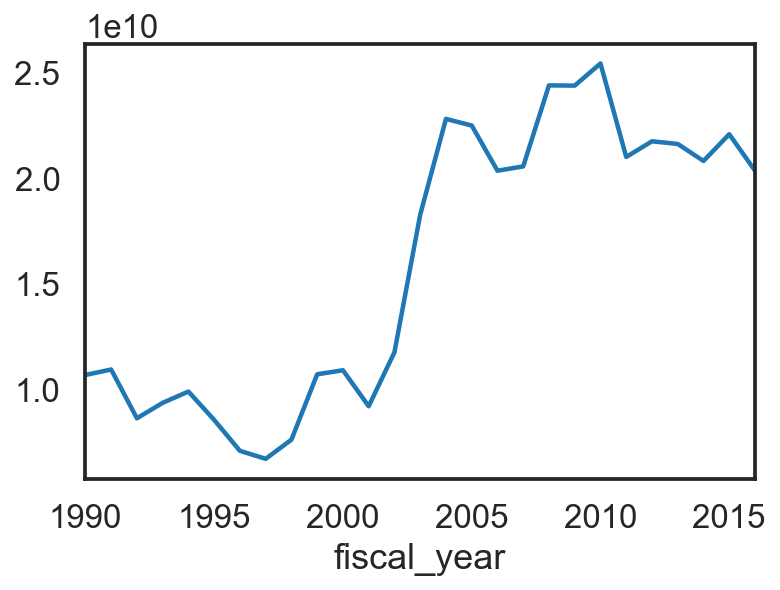

In [41]:
economic_aid_by_year.plot()

In [42]:
# Things to do:

# - Map USAID spending for top, like, 20 countries over time
# - Bar graph by year for military vs economic expenditures
# - Line plot for total economic vs military spending over time
# - Line plot comparing US GDP to aid spending?



# For main models, 
# maybe have row for each country, and aggregate sum spent in each 
# 'dac_purpose_name' entry
# or 


###### input should be percent of GDP spent on aid in a given year?

# Figure out if there's a correlation like, every dollar spent results in such and such change

#### what if result was HDI score CHANGE for that year (from year before), inputs are country 
## (countries should be dummy-coded), amount of money spent that year on 'dac_purpose_name'
##  -->> use this to figure out which variables/programs have the biggest effect!!!


In [43]:
# First, do we want to see if there's correlation between aid received and HDI? 
# like graph money given vs HDI 